<a href="https://colab.research.google.com/github/TerryTian21/PyTorch-Practice/blob/main/Tutorials/Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Techniques for ML

## What is Ensemble Learning

Combining multiple machine learning models to solve a machine learning problem. There are three main components of ensemble learning.

1. Random Data Samples - Each sample has an equal probability of being chosen
2. Weak Learners - A ML model which performs relatively poorly
3. Final Model - A combination of the weak learners

## Bias

Sometimes called algorithm bias or AI bias is a phenonmenon that occurs when an algorithm produces results that a systemically prejudiced due to erroneous assumptions.

i.e. All data points are skewed `x` degrees left.

## Variance

An error from sensitivity to small fluctuations in the training set. High variacne can cause an algorithm to model the random noise in the training data rather than the intended outputs.

## Different types of Ensemble Methods

1. Bagging - Also known as bootstrap aggregation. We randomly sample `m` observeratioons from a population of `n`. Where $ n>m $. Models are trained using the bootstrap samples and the final output is usually a result of soft voting from the models.

2. Stacking - Also known as voting. 2 or more models are created from the same dataset and the final model aggregates the results from each of the weak learners, with the opportunity to weight each model's output.

3. Boosting - A sequential learning technique where subsequent models are fit to the residuals of the previous models. Incorrect classifications or high loss data points are prioritized in subsequent models.

# Ensemble Learning in Action

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np


In [3]:
data = load_iris()

In [4]:
# Create the dataframe

df = pd.DataFrame(data = data.data, columns=data.feature_names)
df.insert(4, "Class", data.target, True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Bagging

https://machinelearningmastery.com/bagging-ensemble-with-python/

Note: Bagging is usally performed on high variance model's like Decision Trees since draw n-raandom samples decreases variance without affecting bias thus improving model performance.

In [5]:
# Create our features and targets

X = df.drop("Class", axis="columns")
y = df["Class"]

In [ ]:
X.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


We will start by visualizing the data

Text(0, 0.5, 'Width')

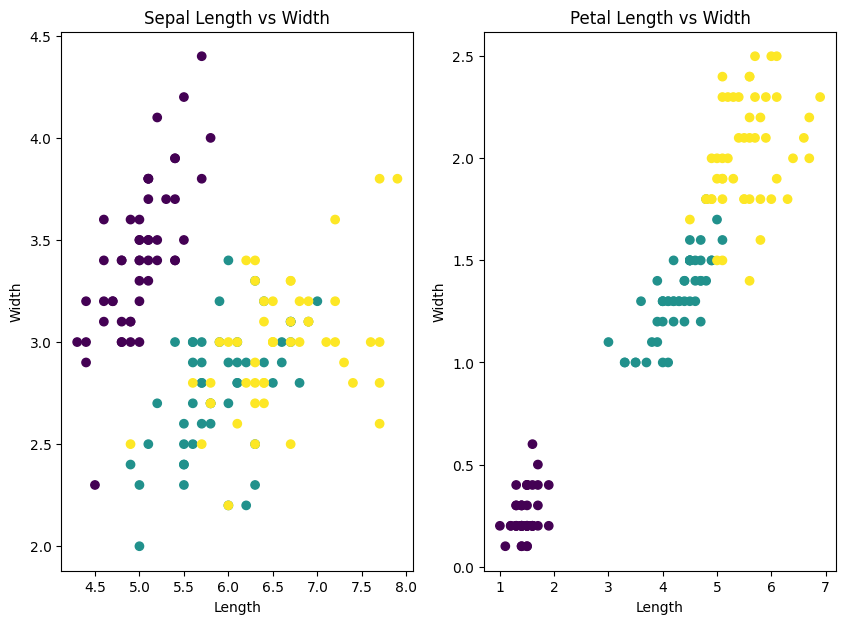

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

# Create the first subplot
plt.subplot(1,2,1)
plt.scatter(df["sepal length (cm)"], df["sepal width (cm)"], c=df["Class"])
plt.title("Sepal Length vs Width")
plt.xlabel("Length")
plt.ylabel("Width")

plt.subplot(1,2,2)
plt.scatter(df["petal length (cm)"], df["petal width (cm)"], c=df["Class"])
plt.title("Petal Length vs Width")
plt.xlabel("Length")
plt.ylabel("Width")

Let's scale the data. We can use the `StandardScaler` from `sklearn`.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5], X[:5].to_numpy()

(array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
        [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
        [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
        [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
        [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]]),
 array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]))

Splitting the Dataset into train and test

The `stratify` parameter dictates where to keep the same proportion of classes in training and test sets. For example if 80% of the data belonged to class A. Then in both the train and test dataset, this proportion is maintained.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, stratify=y)

In [ ]:
X_train.shape, X_test.shape

((112, 4), (38, 4))

Let's create our weak learner and check the accuracy. We will be using the `DecisionTreeClassifier` and K-Fold cross-validation.

K-Fold cross-validation allows us to split the dataset into various subsets and the model is then trained using each subset and gets the accuracy scores after each iteration. K referes to the number of subsets of folds the dataset gets divided into.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

score = cross_val_score(DecisionTreeClassifier(), X_scaled, y, cv=5)
print(f"Scores : {score}")
print(f"Average Score: {score.mean()}")


Scores : [0.96666667 0.96666667 0.9        1.         1.        ]
Average Score: 0.9666666666666668


Implementing the bagging algorithm.

We can start by building the `BaggingClassifier` which fits the weak learners (DecisionTreeClassifier) on randomply sampled subsets and creates an aggregated final model which implements a voting mechansim to produce the final class

- **n-estimators** : Represents the number of weak learners used.
- **max_sample** : The maximum number of data that is sampled from the training set
- **bootstrap** : Allows for resampling of the training set without replacement
- **oob_score** Used to compute accuracy score after training. Taken from the data that was not used as part of the training subset


In [ ]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                              n_estimators=20,
                              max_samples=0.8,
                              bootstrap=True,
                              oob_score=True,
                              random_state=42)

In [ ]:
bag_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=20, oob_score=True, random_state=42)

Notice how the accuracy actually decreased from our original decision tree. It could be that there was no need for bagging as the dataset was small and introducing bagging added a layer of uncessary complication.

In [ ]:
# Check results

print(bag_model.oob_score_)
print(bag_model.score(X_test, y_test))

0.9464285714285714
0.9210526315789473


### More Complex Data

In [10]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from numpy import arange

def get_data():
  X, y = make_classification(n_samples = 2000, n_features=10, n_informative=5, random_state=42)
  return X, y

# Creates a series of models with different number of weak classifiers
def get_models_trees(n_trees):
  models = {}
  for n in n_trees:
    models[str(n)] = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=n, bootstrap=True, random_state=42)
  return models

def get_models_samples():
  models = {}
  for n in arange(0.1, 1.1, 0.1):
    key = "{:.1f}".format(n)
    print(key)
    models[key] = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators = 30, bootstrap = True, max_samples=n, random_state=42)
  return models

def evaluate_model(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
  scores = cross_val_score(model, X, y, cv=cv)
  return scores

Try tuning some hyperparameters

1. Number of weak models
2. Sample Size used by each model

In [11]:
# Creating train and test data
from sklearn.model_selection import train_test_split

X, y = get_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)


In [ ]:
# Tuning number of models
from tqdm.auto import tqdm

n_trees = [5, 10, 20, 50, 100, 200]
models = get_models_trees(n_trees)


results_trees = {"name": [],
                 "test": [],
                 "train": []}

for name, model in tqdm(models.items()):
  print(f"Name: {name}")
  model.fit(X_train, y_train)
  train_results = evaluate_model(model, X_train, y_train)
  test_results = evaluate_model(model, X_test, y_test)

  print(f"Train Acc: {train_results.mean()} | Test Acc {test_results.mean()}")
  results_trees["name"].append(name)
  results_trees["train"].append(train_results.mean())
  results_trees["test"].append(test_results.mean())


  0%|          | 0/6 [00:00<?, ?it/s]

Name: 5
Train Acc: 0.8897916666666668 | Test Acc 0.8591666666666666
Name: 10
Train Acc: 0.8920833333333335 | Test Acc 0.8716666666666668
Name: 20
Train Acc: 0.8989583333333333 | Test Acc 0.8833333333333334
Name: 50
Train Acc: 0.9047916666666667 | Test Acc 0.8916666666666665
Name: 100
Train Acc: 0.9054166666666664 | Test Acc 0.8933333333333333
Name: 200
Train Acc: 0.9058333333333334 | Test Acc 0.9049999999999999


In [20]:
# Plot the model's performance
import matplotlib.pyplot as plt

def plot_performance(results: dict,
                     width: float,
                     title,
                     y_axis_start,
                     y_axis_end):
  plt.figure(figsize=(11,7))

  n = len(results["name"])
  r = np.arange(n)

  plt.bar(r, results["train"], width=width, color='g', edgecolor='grey', label="Train")
  plt.bar(r + width, results["test"], width=width, color='b', edgecolor="grey", label="Test")

  plt.ylim(y_axis_start, y_axis_end)
  plt.xticks(ticks=r + width/2, labels=results["name"])
  plt.xlabel("Model")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.title(title)


From the plot, we notice that increasing the number of leaners increases both the train and test accuracy. Given the stochastic nature of the algorithm, overfitting isn't a huge concern despite increasing the number of trees.

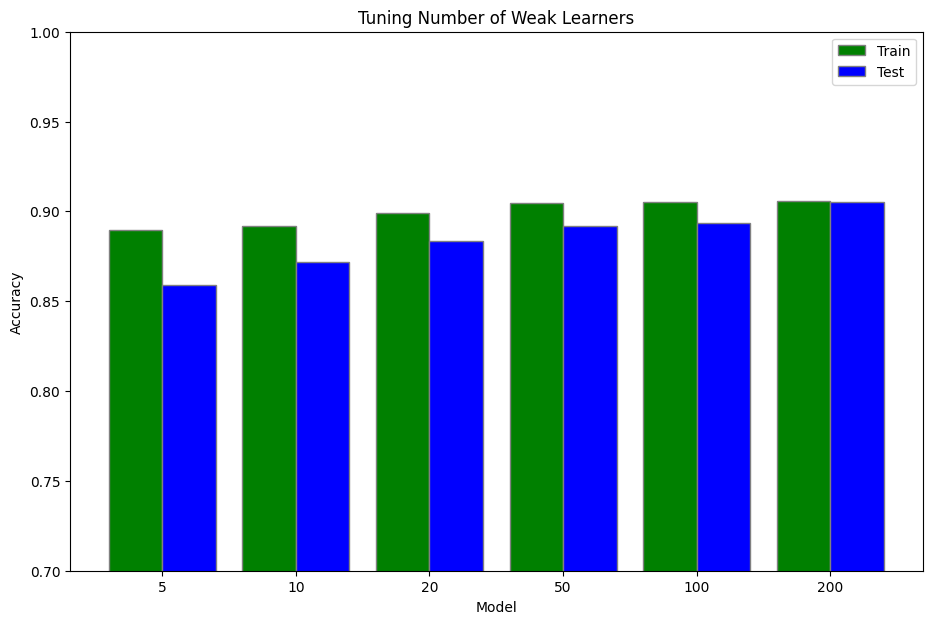

In [ ]:
plot_performance(results_trees, 0.4, "Tuning Number of Weak Learners")

In [ ]:
# Tuning the sample size

results_samples = {"name": [],
                   "train": [],
                   "test": []}

models = get_models_samples()

for name, model in tqdm(models.items()):
  print(f"Model: {name}")
  model.fit(X_train, y_train)
  train_results = evaluate_model(model, X_train, y_train)
  test_results = evaluate_model(model, X_test, y_test)

  print(f"Train Acc: {train_results.mean()} | Test Acc: {test_results.mean()}")
  results_samples["name"].append(name)
  results_samples["train"].append(train_results.mean())
  results_samples["test"].append(test_results.mean())


0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0


  0%|          | 0/10 [00:00<?, ?it/s]

Model: 0.1
Train Acc: 0.8687499999999999 | Test Acc: 0.8433333333333334
Model: 0.2
Train Acc: 0.888125 | Test Acc: 0.8541666666666667
Model: 0.3
Train Acc: 0.89125 | Test Acc: 0.8666666666666668
Model: 0.4
Train Acc: 0.8956250000000001 | Test Acc: 0.8733333333333333
Model: 0.5
Train Acc: 0.8941666666666667 | Test Acc: 0.8791666666666667
Model: 0.6
Train Acc: 0.9016666666666667 | Test Acc: 0.8908333333333334
Model: 0.7
Train Acc: 0.900625 | Test Acc: 0.8908333333333334
Model: 0.8
Train Acc: 0.8995833333333333 | Test Acc: 0.8850000000000001
Model: 0.9
Train Acc: 0.903125 | Test Acc: 0.8866666666666666
Model: 1.0
Train Acc: 0.90125 | Test Acc: 0.8883333333333333


Generally, we notice an improvement in the accuracy of the model as training set size is increased. This suggests that choosing default value of 1 is reasonable, but a `max_sample` of 0.7 seems to have the best performace here.

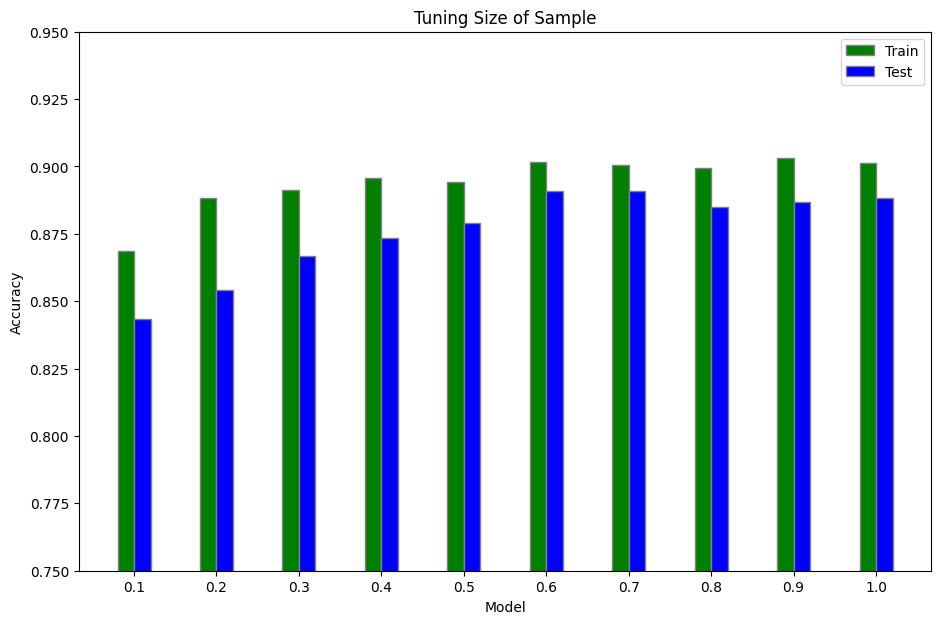

In [ ]:
# Plot results
plot_performance(results_samples, 0.2, "Tuning Size of Sample")

### Trying a Different Classifier

Instead of Decision Trees, let's try and use KNN with K set to a smaller value.

We will use the same dataset above, only modifying the `get_models()` function.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def get_models_knn():
  models = {}
  for i in range(3, 16):
    base = KNeighborsClassifier(n_neighbors=i)
    models[str(i)] = BaggingClassifier(base, n_estimators=20, max_samples=0.8, bootstrap=True, random_state=42)
  return models

In [ ]:
models = get_models_knn()

results_knn = {"name": [],
               "train": [],
               "test": []}

for name, model in tqdm(models.items()):
  print(f"Model: {name}")

  model.fit(X_train, y_train)
  train_results = evaluate_model(model, X_train, y_train).mean()
  test_results = evaluate_model(model, X_test, y_test).mean()

  print(f"Train Acc: {train_results:.2f} | Test Acc : {test_results:.2f}")
  results_knn["name"].append(name)
  results_knn["train"].append(train_results)
  results_knn['test'].append(test_results)


  0%|          | 0/13 [00:00<?, ?it/s]

Model: 3
Train Acc: 0.89 | Test Acc : 0.87
Model: 4
Train Acc: 0.89 | Test Acc : 0.88
Model: 5
Train Acc: 0.90 | Test Acc : 0.88
Model: 6
Train Acc: 0.90 | Test Acc : 0.89
Model: 7
Train Acc: 0.90 | Test Acc : 0.89
Model: 8
Train Acc: 0.90 | Test Acc : 0.89
Model: 9
Train Acc: 0.90 | Test Acc : 0.89
Model: 10
Train Acc: 0.90 | Test Acc : 0.89
Model: 11
Train Acc: 0.90 | Test Acc : 0.89
Model: 12
Train Acc: 0.90 | Test Acc : 0.89
Model: 13
Train Acc: 0.90 | Test Acc : 0.88
Model: 14
Train Acc: 0.90 | Test Acc : 0.88
Model: 15
Train Acc: 0.90 | Test Acc : 0.88


Notice a trend of increasing accuracy with K-value in the beginning then a modest decrease in performance.

This is likely a results of the variance-bais trade off in KNNs. Where initially the bias increases with variance decreasing, but as K grows, the bias increases to a level where it begins to oversimplify the model.

As K increases, the boundaries becomes smoother but as K becomes too large it inclues too much noise and loses import patterns/info.

In high dimensions, the curse of dimensionality comes into play where points are all similar "distance" and losses ability to capture structure/shape.

An ensemble is still dependent on the performance of the weak learners.

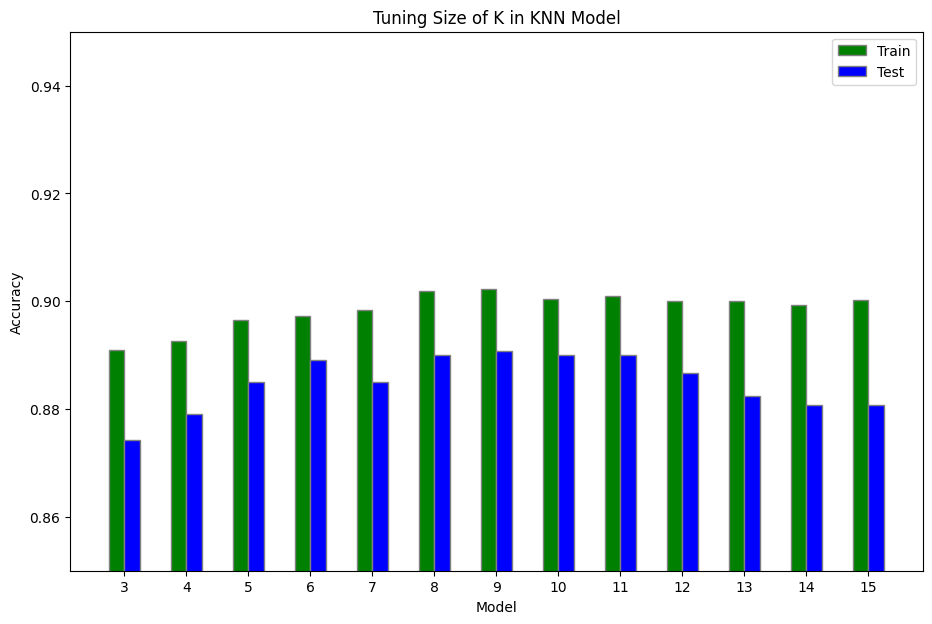

In [ ]:
plot_performance(results_knn, 0.25, "Tuning Size of K in KNN Model")

 ### Extensions

 The most famous is the random forest, where both rows and columns are randomly sampled in the weak learners.

Pasting Ensemble

Fitting ensemble members based on random samples of the training dataset instead of bootstrap samples. Designed to use smaller sample sizes than training dataset in which train data does not fit into memory.

In [9]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(bootstrap=False, max_samples=0.5)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
n_scores = cross_val_score(model, X, y, cv=cv)

print(f"Accuracy: {n_scores.mean():.3f}")

Accuracy: 0.942


Random Subspaces Ensemble

Fitting enxemble members based on dataets constructed from random subsets of the features in the training dataset.

Similar to random forest except the data samples are random rather than a bootstrap sample and the subset of features is selected for the entire tree rather than at each split.

In [15]:
def get_models_feature():
  models = {}
  for i in range(1, 11):
    models[str(i)] = BaggingClassifier(estimator=DecisionTreeClassifier(),
                                       n_estimators=15,
                                       max_features = i,
                                       bootstrap = False,
                                       bootstrap_features = False)
  return models

In [16]:
from tqdm.auto import tqdm

results_feature = {"name": [],
                   "train": [],
                   "test": []}

models = get_models_feature()

for name, model in tqdm(models.items()):
  print(f"Model: {name}")

  model.fit(X_train, y_train)
  train_result = evaluate_model(model, X_train, y_train).mean()
  test_result = evaluate_model(model, X_test, y_test).mean()

  print(f"Train Acc: {train_result:.2f} | Test Acc: {test_result:.2f}")
  results_feature["train"].append(train_result)
  results_feature["test"].append(test_result)
  results_feature["name"].append(name)

  0%|          | 0/10 [00:00<?, ?it/s]

Model: 1
Train Acc: 0.59 | Test Acc: 0.58
Model: 2
Train Acc: 0.71 | Test Acc: 0.71
Model: 3
Train Acc: 0.82 | Test Acc: 0.76
Model: 4
Train Acc: 0.86 | Test Acc: 0.82
Model: 5
Train Acc: 0.89 | Test Acc: 0.83
Model: 6
Train Acc: 0.90 | Test Acc: 0.85
Model: 7
Train Acc: 0.90 | Test Acc: 0.86
Model: 8
Train Acc: 0.89 | Test Acc: 0.84
Model: 9
Train Acc: 0.87 | Test Acc: 0.83
Model: 10
Train Acc: 0.86 | Test Acc: 0.83


Note the total number of features was 10. We notice an increase in performance from 1 - 5 where it then levels off. And then eventually get a slight decrease afterwards.

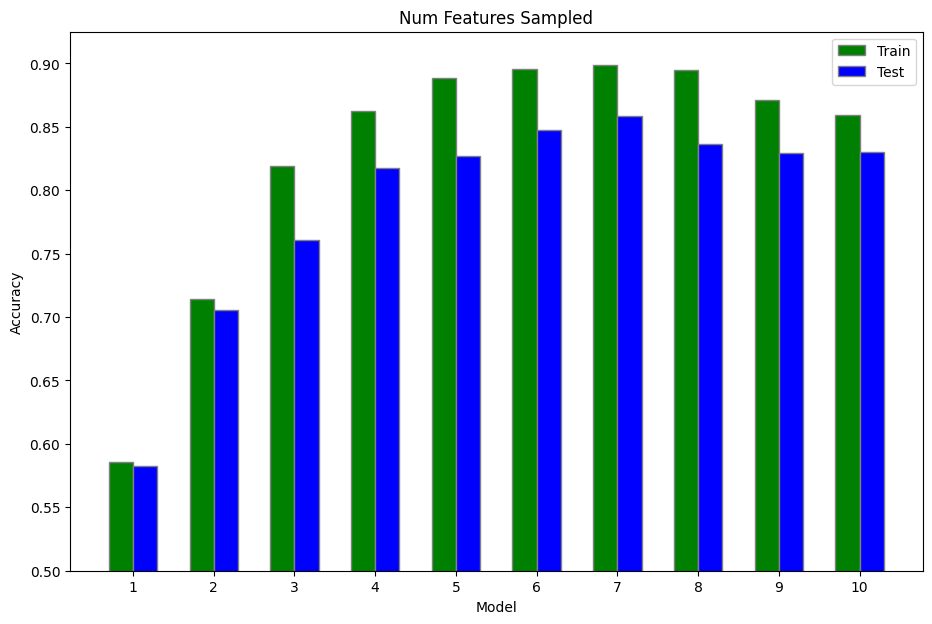

In [21]:
plot_performance(results_feature, 0.3, "Num Features Sampled", 0.5, 0.925)

Random Patches Ensemble

Involves fitting ensemble members based on datasets constructed from random subsets of rows and columns. It could be interpreted as a combination of Pasting Ensemble and Subspace Ensemble.

Essentially Random Forest but without bootstrapping.

In [24]:
model = BaggingClassifier(estimator=DecisionTreeClassifier(),
                          bootstrap=False,
                          max_features=5,
                          max_samples=0.5)

# Splits the data in 10 subsets then calculates accuracy on each subset and repeats this three times
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats=3, random_state=42)
n_scores = cross_val_score(model, X, y, cv=cv)

print(f"All scores: {n_scores}")
print(f"Average score: {n_scores.mean()}")

All scores: [0.885 0.86  0.89  0.84  0.865 0.865 0.865 0.79  0.925 0.855 0.885 0.855
 0.86  0.9   0.87  0.895 0.85  0.865 0.88  0.885 0.86  0.795 0.855 0.895
 0.825 0.895 0.85  0.875 0.84  0.87 ]
Average score: 0.8648333333333333


## Boosting